In [1]:
import pymc3 as pm
import arviz as az
import numpy as np

In [2]:
"""
What does sampling the prior and feeding it into other priors doing here?
- This example does 4 chains. Each chain here includes "all of the parameters".
- Imagine we took my mid-term code and ran it 4 different times with 4 different "seeds".
- In the exam, we sampled from conditionals (Gibbs). Here, we are not sampling from conditionals.


Insight: Gibbs sampling is quite manual. In PyMC, we can just define the hierarchial model
directly. Under the hood, it will: compute joint likelihood, define some acceptance ratio, and do 
otherwise manual calculations automatically, under the hood.

WinBugs does Gibbs sampling under the hood, whereas PyMC does not.
"""

# Apparently, this is not technically Gibbs sampling
with pm.Model() as q3:
    # At the beginning of each iteration, it will:
    
    # 1. Sample prior (lowest in hierarchy)
    nu2 = pm.InverseGamma("nu2", 10, 10) 

    # 2. Do this conversion, so that nu shows up in the trace table below
    nu = pm.Deterministic("nu", nu2**0.5)

    # 3. Feed that sample into our theta priors (2nd lowest in hierarchy)
    theta1 = pm.Normal("theta1", 0, sigma=nu) 
    theta2 = pm.Normal("theta2", 0, sigma=nu)

    # 4. Feed thetas into the likelihood
    pm.Normal("likelihood", theta1 + theta2, sigma=1, observed=0.5)

    # 5. Create trace
    trace = pm.sample(3000)

/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta2, theta1, nu2]


/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 6 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<Axes: title={'center': 'theta1'}>,
        <Axes: title={'center': 'theta1'}>],
       [<Axes: title={'center': 'theta2'}>,
        <Axes: title={'center': 'theta2'}>],
       [<Axes: title={'center': 'nu2'}>, <Axes: title={'center': 'nu2'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

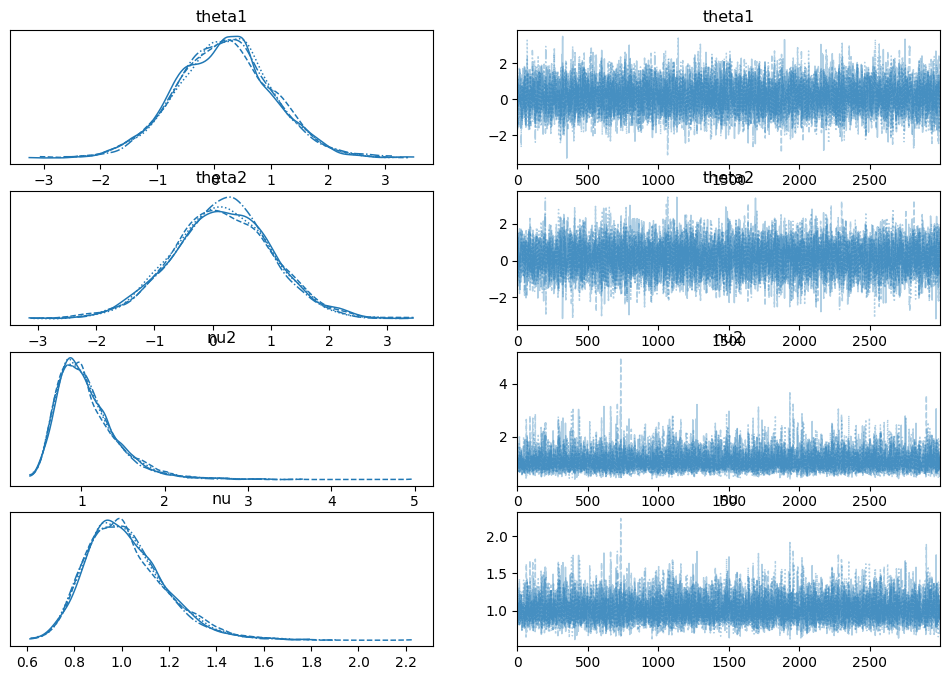

In [3]:
az.plot_trace(trace) # one dotted line for each chain, and maybe a mean line

In [4]:
az.summary(trace, hdi_prob=0.95)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/adamcuculich/georgia-tech/bayesian-stats/env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta1,0.171,0.846,-1.498,1.830,0.009,0.008,7997.0,7608.0,1.0
theta2,0.161,0.852,-1.572,1.777,0.009,0.008,8149.0,8443.0,1.0
nu2,1.067,0.370,0.486,1.797,0.004,0.003,9707.0,7401.0,1.0
nu,1.019,0.169,0.726,1.358,0.002,0.001,9707.0,7401.0,1.0
